In [55]:
# Importing necessary libraries

import cv2
import numpy as np
import pandas as pd
import os
from PIL import Image
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers


%matplotlib inline

In [3]:
# Loading all the scrapped images.

images = []
folder = r'C:\Users\lenovo\FlipRobo\Image_Classification\data'

for filename in os.listdir(folder):
    try:
        img = Image.open(os.path.join(folder, filename))
        img = img.resize((224, 224))
        if img is not None:
            images.append(np.array(img))
    except:
        print('Cant import ' + filename)

# Converting the data into array
X = np.asarray(images)

In [4]:
# Checking the shape of the data
X.shape

(685, 224, 224, 3)

In [5]:
# Loading the image dataset (csv file).

data = pd.read_csv("data.csv")

In [6]:
# Converting the same into array

y = np.asarray(data)
y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [7]:
# Separating the data into train and test datasets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [8]:
# Checking the shape of the splitted data.

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("y_train shape: " + str(y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("y_test shape: " + str(y_test.shape))

number of training examples = 548
number of test examples = 137
X_train shape: (548, 224, 224, 3)
y_train shape: (548, 1)
X_test shape: (137, 224, 224, 3)
y_test shape: (137, 1)


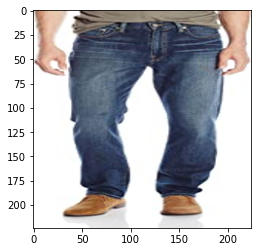

In [13]:
# Visualizing Training data

plt.imshow(images[56])

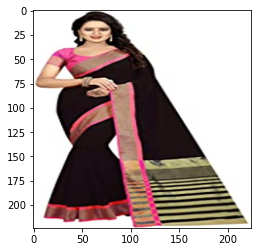

In [14]:
plt.imshow(images[321])

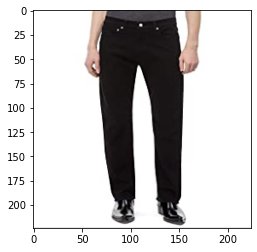

In [15]:
plt.imshow(images[123])

In [18]:
# Creating the model
model=Sequential()

# First convolution layer
model.add(Conv2D(32,(3,3),input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Second convolution layer
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Third convolution layer
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Fourth convolution layer
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
activation_2 (Activation)    (None, 109, 109, 32)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 32)       

In [19]:
# Compiling the model

model.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [20]:
# Fitting the model

model.fit(X, y, batch_size=32, epochs=30, validation_split=0.1)

Epoch 1/30
20/20 [==============================] - 29s 1s/step - loss: 87.4326 - accuracy: 0.3803 - val_loss: 1.1188 - val_accuracy: 0.0725
Epoch 2/30
20/20 [==============================] - 30s 1s/step - loss: 0.9677 - accuracy: 0.5457 - val_loss: 1.1776 - val_accuracy: 0.0000e+00
Epoch 3/30
20/20 [==============================] - 30s 2s/step - loss: 0.8116 - accuracy: 0.6250 - val_loss: 1.1350 - val_accuracy: 0.0000e+00
Epoch 4/30
20/20 [==============================] - 29s 1s/step - loss: 0.6082 - accuracy: 0.7413 - val_loss: 1.1009 - val_accuracy: 0.2029
Epoch 5/30
20/20 [==============================] - 30s 1s/step - loss: 0.6795 - accuracy: 0.6863 - val_loss: 1.4555 - val_accuracy: 0.0000e+00
Epoch 6/30
20/20 [==============================] - 29s 1s/step - loss: 0.5566 - accuracy: 0.7762 - val_loss: 1.1535 - val_accuracy: 0.0870
Epoch 7/30
20/20 [==============================] - 30s 1s/step - loss: 0.5962 - accuracy: 0.7521 - val_loss: 1.0591 - val_accuracy: 0.1594
Epoch 8

In [21]:
# Evaluating the model

preds = model.evaluate(x = X_test, y = y_test, verbose=1)

print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

5/5 [==============================] - 1s 259ms/step - loss: 0.2544 - accuracy: 0.8978

Loss = 0.25440308451652527
Test Accuracy = 0.8978102207183838


In [63]:
# Saving the model.

model.save('Image_classification.h5')

________________________________________________________________________________________________________________________________